###  Data Cleaning / Очистка данных
На этом этапе:
1. Удаление дубликатов
2. 
3. Обработка выбросов
4. Обработка пропущенных категориальных данных
5. Обработка пропущенных числовых данных


Drop unwanted observations
Fix structural errors
Remove unwanted outliers
Label missing categorical data
Flag and fill missing numerical data

In [2]:
import sqlite3
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# %matplotlib inline
import seaborn as sns

In [3]:
conn = sqlite3.connect('db\cian_fake_2.db') 
          
df = pd.read_sql_query ('''
                               SELECT
                               flat_type, rooms, price, price_per_meter, sale_type, mortgage, area,
                       living_area, kitchen_area, floor, floors, built_year, address, district, metro_station, seller,
                       housing_type, planning, ceiling_height, bathroom, balcony_loggia, repair, view,
                       finished_shell_condition, house_type, house_class, building_number, parking, elevators,
                       housing_line, floor_type, entrance_number, heating, unsafe_house, garbage_disposal, gas_supply,
                       description_text
                               FROM ad_data
                               ''', conn)

1. Удаление дубликатов

In [4]:
# удаление обычных дубликатов
df = df.drop_duplicates()
print(df.shape)

(10000, 37)


In [5]:
# помимо обычных дубликатов также больше одного объявления могут относится к одной квартире
# у такаих дубликатов адрес, этаж, тип, количество комнат, площадь кухни должны совпадать
print(df[df.duplicated(subset = ['address', 'flat_type', 'floor', 'floors', 'kitchen_area'])])
df = df.drop_duplicates(subset = ['address', 'flat_type', 'floor', 'floors', 'kitchen_area'])
print(df.shape)

Empty DataFrame
Columns: [flat_type, rooms, price, price_per_meter, sale_type, mortgage, area, living_area, kitchen_area, floor, floors, built_year, address, district, metro_station, seller, housing_type, planning, ceiling_height, bathroom, balcony_loggia, repair, view, finished_shell_condition, house_type, house_class, building_number, parking, elevators, housing_line, floor_type, entrance_number, heating, unsafe_house, garbage_disposal, gas_supply, description_text]
Index: []

[0 rows x 37 columns]
(10000, 37)


In [6]:
# TODO сейчас среди всех дубликатов остается первый. Но изначально цена и другая информация разные. Цену можно усреднить, а что делать с категориальными данными?

2 Fix structural errors

In [7]:
# отбражение уникальных значений столбца "отделка"
df['finished_shell_condition'].unique()

array(['нет', 'предчистовая', None, 'чистовая', 'черновая'], dtype=object)

In [8]:
# замена None-значений на 0
df['finished_shell_condition'] = df['finished_shell_condition'].fillna(0)

In [9]:
# проверка замены
df['finished_shell_condition'].unique()

array(['нет', 'предчистовая', 0, 'чистовая', 'черновая'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='finished_shell_condition'>

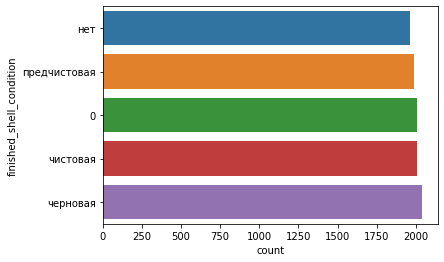

In [10]:
# построение гистограммы для вывления опечаток и неодинаковых регистров
sns.countplot(y='finished_shell_condition', data=df)

In [11]:
# TODO если есть опечатки, исправить по типу df.roof.replace('composition', 'Composition', inplace=True)

3 Обработка выбросов

<AxesSubplot:xlabel='price'>

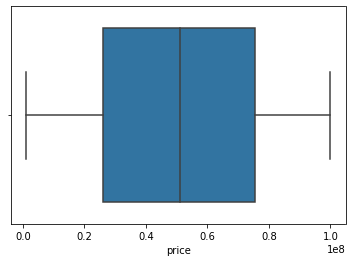

In [12]:
# коробчатая диаграмма целевой переменной
sns.boxplot(x = 'price', data=df)

<AxesSubplot:xlabel='price'>

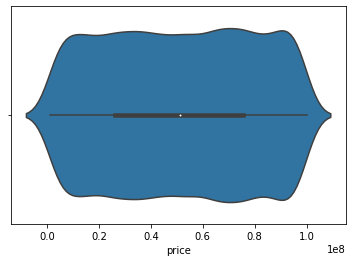

In [16]:
# скрипичный график целевой переменной (плотность распределения)
sns.violinplot(x= 'price', data=df)

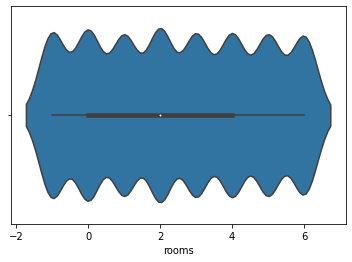

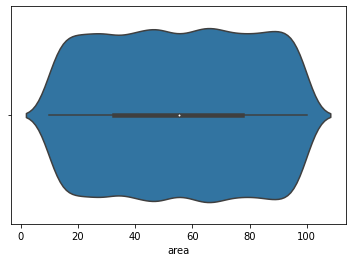

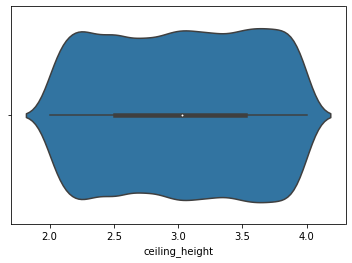

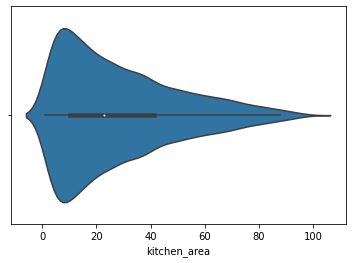

In [18]:
# TODO уточнить, какие именно переменные строить
# скрипичный график перемнной количества комнат
sns.violinplot(x='rooms', data=df)
plt.show()

# скрипичный график переменной площади
sns.violinplot(x='area', data=df)
plt.show()

# скрипичный график переменной высоты потолков
sns.violinplot(x='ceiling_height', data=df)
plt.show()

# скрипичный график переменной площади кухни
sns.violinplot(x='kitchen_area', data=df)
plt.show()

In [19]:
# предположим, что выбросы имеет переменная площади кухни
# отображение 5 наибольших значений переменной с выбросами
df.kitchen_area.sort_values(ascending=False).head(5)

7066    99.31
4528    97.72
8367    97.13
166     96.97
905     96.84
Name: kitchen_area, dtype: float64

In [20]:
# удаление выбросов
# df = df[df.lot_size < 500000]
len(df)

10000

4 Обработка пропущенных категориальных данных

In [21]:
# количество пропущенных наблюдений для категориальных данных
df.select_dtypes(include=['object']).isnull().sum()

flat_type                      0
sale_type                      0
address                        0
district                       0
metro_station                  0
seller                         0
housing_type                3339
planning                    2504
bathroom                       0
balcony_loggia                 0
repair                      2011
view                        2483
finished_shell_condition       0
house_type                  3391
house_class                 3349
parking                     2518
elevators                      0
housing_line                   0
floor_type                  3311
heating                        0
unsafe_house                3306
garbage_disposal            3361
gas_supply                  3392
description_text               0
dtype: int64

In [22]:
# замена пропущенных наблюдений на значение "пропущено"
for column in df.select_dtypes(include=['object']).columns.tolist():
    df[column] = df[column].fillna('пропущено')

In [23]:
# отображение пропущенных значений для категориальных данных
df.select_dtypes(include=['object']).isnull().sum()

flat_type                   0
sale_type                   0
address                     0
district                    0
metro_station               0
seller                      0
housing_type                0
planning                    0
bathroom                    0
balcony_loggia              0
repair                      0
view                        0
finished_shell_condition    0
house_type                  0
house_class                 0
parking                     0
elevators                   0
housing_line                0
floor_type                  0
heating                     0
unsafe_house                0
garbage_disposal            0
gas_supply                  0
description_text            0
dtype: int64

5 Обработка пропущенных числовых данны

In [24]:
# отображение пропущенных значений для числовых данных
df.select_dtypes(exclude=['object']).isnull().sum()

rooms                0
price                0
price_per_meter      0
mortgage             0
area                 0
living_area          0
kitchen_area         0
floor                0
floors               0
built_year           0
ceiling_height       0
building_number    914
entrance_number      0
dtype: int64

In [ ]:
# TODO обработать попущенные значения, заполнить либо медианой, либо средним и пр.

In [26]:
# сохрание очищенных данных
df.to_sql('ad_data_cleaned', conn, if_exists='replace', index = False)

10000